In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
print(os.getcwd())

C:\Users\shiva\Documents\Python-revice\Projects-DataAnalysis


#### Read CSV

In [27]:
pd_Content=pd.read_csv("./Accerture/Content.csv")
pd_reaction=pd.read_csv("./Accerture/Reactions.csv")
pd_reactionTypes=pd.read_csv("./Accerture/ReactionTypes.csv")

### Shape

In [29]:
pd_Content.shape

(1000, 6)

In [31]:
pd_reaction.shape

(25553, 5)

In [33]:
pd_reactionTypes.shape

(16, 4)

### Finding Missing Values

In [39]:
#Null values in the content 
pd_Content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [41]:
pd_reaction.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [43]:
pd_reactionTypes.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [45]:
#plot the missing values

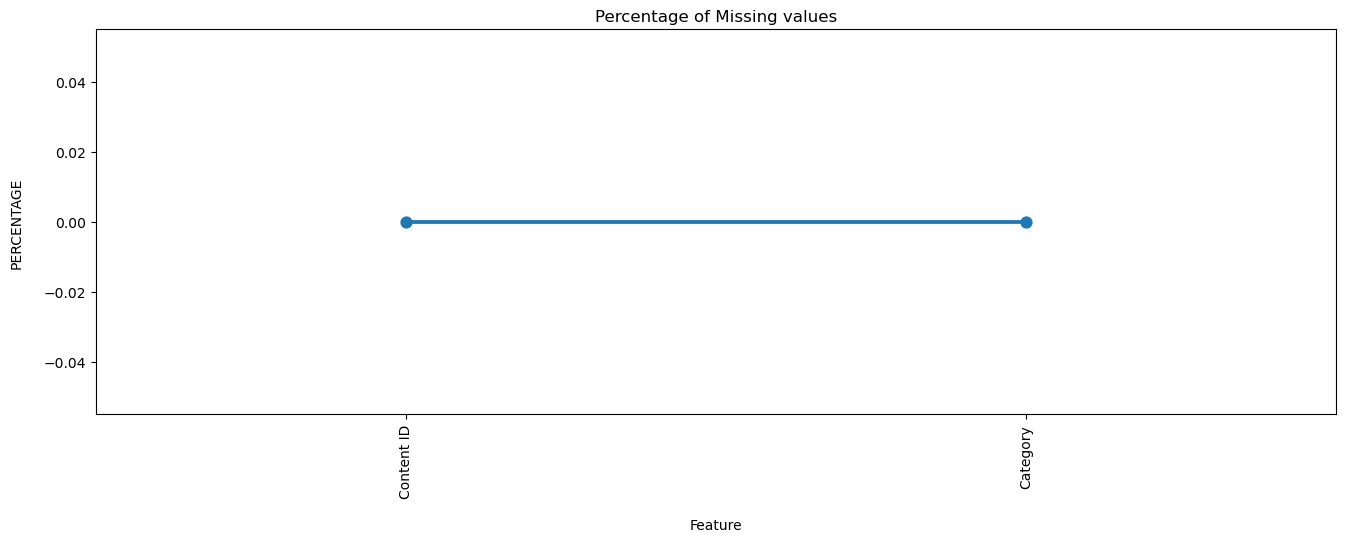

In [93]:
missing = pd.DataFrame((pd_Content.isnull().sum())*100/pd_Content.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

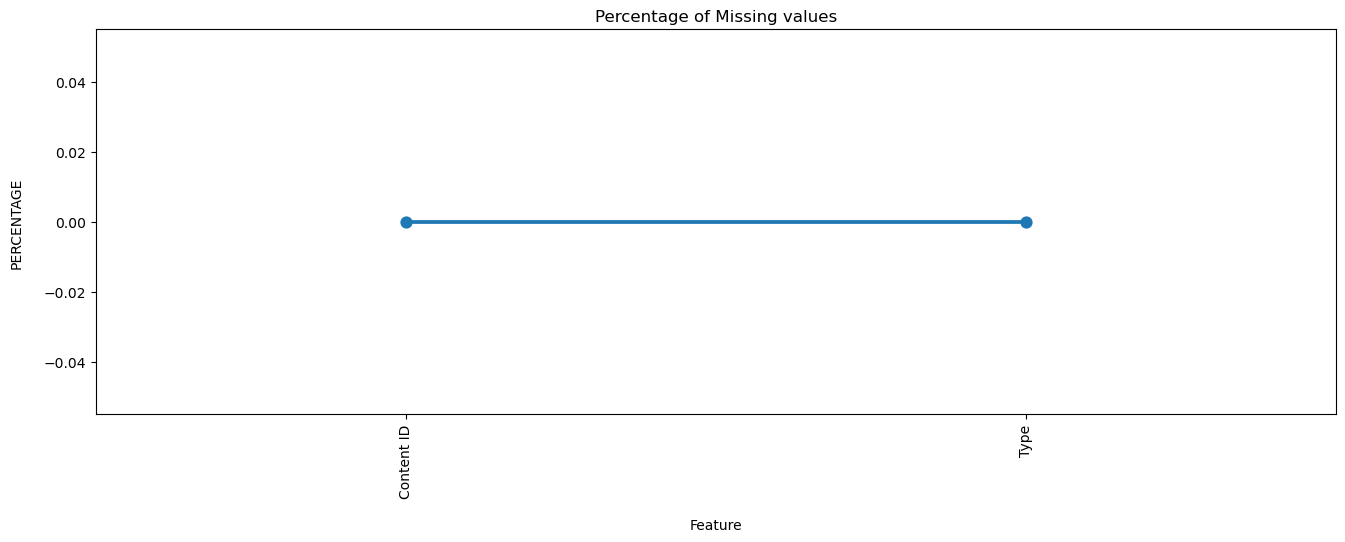

In [95]:
missing = pd.DataFrame((pd_reaction.isnull().sum())*100/pd_reaction.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

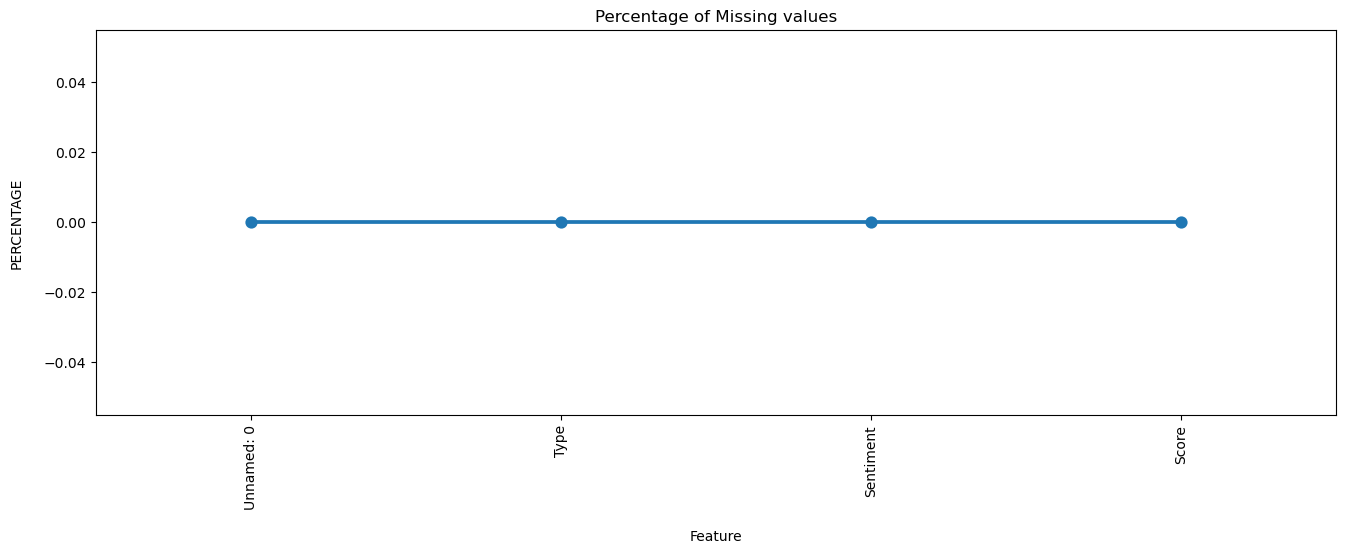

In [51]:
missing = pd.DataFrame((pd_reactionTypes.isnull().sum())*100/pd_reactionTypes.shape[0]).reset_index()
missing.columns = ['column', 'percentage']  # Rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='percentage',data=missing)
plt.xlabel("Feature",labelpad=14)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE",labelpad=14)
plt.show()

### Remove the Rows that are missing 

In [56]:
#Removing missing values 
pd_Content.dropna(how = 'any', inplace = True)

In [58]:
pd_reaction.dropna(how = 'any', inplace = True)

#### Change the data types if needed

In [61]:
#get the dtpes of each data set
# pd_Content = pd.to_numeric(telco_data.TotalCharges, errors='coerce')#if there is invalid parsing the it is converted to Nan
# pd_Content[columns_to_convert]=pd_Content[columns_to_convert].apply(pd.,errors="coerce")

In [63]:
pd_reaction.dtypes
columns_to_convert=["Datetime"]
pd_reaction[columns_to_convert]=pd_reaction[columns_to_convert].apply(pd.to_datetime,errors='coerce')

#### Drop the columns that are unnessesary 

In [66]:
pd_Content.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)
pd_Content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [75]:
pd_Content.drop(columns= ['User ID',"Type","URL"], axis=1, inplace=True)
pd_Content.head()

,Content ID,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,food


In [68]:
pd_reaction.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)
pd_reaction.head()

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [77]:
pd_reaction.drop(columns= ['User ID',"Datetime"], axis=1, inplace=True)
pd_reaction.head()

,Content ID,Type
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested


In [70]:
pd_reactionTypes.drop(columns= ['Unnamed: 0'], axis=1, inplace=True)
pd_reactionTypes.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [79]:
pd_reactionTypes.drop(columns= ['Sentiment'], axis=1, inplace=True)
pd_reactionTypes.head()

,Type,Score
0,heart,60
1,want,70
2,disgust,0
3,hate,5
4,interested,30


#### Look for Top Three Performing Columns

In [73]:
#Create the data set Merging the tables Of Reaction and Content

In [83]:
# Merge the datasets on 'contentid' and 'userid'
merged_df = pd.merge(pd_Content, pd_reaction, on=['Content ID'], how='inner')

In [113]:
len(pd_Content)

801

In [115]:
len(pd_reaction)

22534

In [111]:
len(merged_df)

18384

In [85]:
mergedwithreaction = pd.merge(merged_df, pd_reactionTypes,on='Type', how='left')

# mergedwithreaction.drop(columns='type', inplace=True)

In [97]:
mergedwithreaction.loc[mergedwithreaction["Content ID"]=="97522e57-d9ab-4bd6-97bf-c24d952602d2"]

,Content ID,Category,Type,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,dislike,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,scared,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,interested,30
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,peeking,35
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,cherish,70
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,hate,5
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,peeking,35
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,indifferent,20


In [109]:
mergedwithreaction["Category"].nunique()

17

In [91]:
len(mergedwithreaction["Content ID"])

18384

In [99]:
Catogory_Score=mergedwithreaction.groupby("Category")["Score"].sum().reset_index(name="Score")

In [107]:
len(Catogory_Score)

17

In [120]:
Top5Catogories=Catogory_Score.sort_values("Score",ascending=False).head(5)

In [ ]:
# Top5Catogories=Top5Records[["Category"]].head(5)

In [122]:
Top5Catogories

,Category,Score
15,travel,53935
10,science,53657
8,healthy eating,52745
1,animals,52443
2,cooking,49681


In [124]:
with pd.ExcelWriter('combined_data1.xlsx') as writer:
    mergedwithreaction.to_excel(writer, sheet_name='Cleaned Data Set', index=False)
    Top5Catogories.to_excel(writer, sheet_name='Top5Catogories', index=False)